In [1]:
# Install tsflex and seglearn
!pip install tsflex --no-index --find-links=file:///kaggle/input/time-series-tools
!pip install seglearn --no-index --find-links=file:///kaggle/input/time-series-tools

Looking in links: file:///kaggle/input/time-series-tools
Processing /kaggle/input/time-series-tools/tsflex-0.3.0-py3-none-any.whl
Looking in links: file:///kaggle/input/time-series-tools
Processing /kaggle/input/time-series-tools/seglearn-1.2.5-py3-none-any.whl


In [2]:
# Importing the Libraries and Packages

import numpy as np # linear algebra
import pandas as pd # data processing
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn import *
import glob

# Input data files from Kaggle Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        path = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/'

# Read and Load the CSV files
train = glob.glob(path+'train/**/**')
test = glob.glob(path+'test/**/**')

subjects = pd.read_csv(path+'subjects.csv')
tasks = pd.read_csv(path+'tasks.csv')
sub = pd.read_csv(path+'sample_submission.csv')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


/kaggle/input/time-series-tools/tsflex-0.3.0-py3-none-any.whl
/kaggle/input/time-series-tools/joblib-1.2.0-py3-none-any.whl
/kaggle/input/time-series-tools/scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/time-series-tools/six-1.16.0-py2.py3-none-any.whl
/kaggle/input/time-series-tools/threadpoolctl-3.1.0-py3-none-any.whl
/kaggle/input/time-series-tools/python_dateutil-2.8.2-py2.py3-none-any.whl
/kaggle/input/time-series-tools/tqdm-4.65.0-py3-none-any.whl
/kaggle/input/time-series-tools/scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/time-series-tools/pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/time-series-tools/numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/time-series-tools/seglearn-1.2.5-py3-none-any.whl
/kaggle/input/time-series-tools/pycatch22-0.4.2/pycatch22-0.4.2/setup.cfg
/kaggle/input/time-series-tools/pycatch22-0.4.2/pyca

In [3]:
# Defog the metadata file
defog_metadata = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv')
defog_metadata.head()

,Id,Subject,Visit,Medication
0,02ab235146,ab54e1,2,on
1,02ea782681,bf608b,2,on
2,06414383cf,c0b71e,2,off
3,092b4c1819,b6a627,1,off
4,0a900ed8a2,b7bd52,2,on


In [4]:
# Visualization of the Defog file (Import and Preview)
file_path = 'defog/02ea782681.csv'
df = pd.read_csv('../input/tlvmc-parkinsons-freezing-gait-prediction/train/'+file_path)
df.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.0,0.044129,-0.25,0,0,0,False,False
1,1,-1.0,0.034431,-0.25,0,0,0,False,False
2,2,-1.0,0.031250,-0.25,0,0,0,False,False
3,3,-1.0,0.031250,-0.25,0,0,0,False,False
4,4,-1.0,0.031250,-0.25,0,0,0,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162907 entries, 0 to 162906
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             162907 non-null  int64  
 1   AccV             162907 non-null  float64
 2   AccML            162907 non-null  float64
 3   AccAP            162907 non-null  float64
 4   StartHesitation  162907 non-null  int64  
 5   Turn             162907 non-null  int64  
 6   Walking          162907 non-null  int64  
 7   Valid            162907 non-null  bool   
 8   Task             162907 non-null  bool   
dtypes: bool(2), float64(3), int64(4)
memory usage: 9.0 MB


In [6]:
# Basic Statistics
df.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,162907.000000,162907.000000,162907.000000,162907.000000,162907.0,162907.000000,162907.0
mean,81453.000000,-0.981353,0.032566,-0.187772,0.0,0.000798,0.0
std,47027.344489,0.073798,0.078877,0.189960,0.0,0.028238,0.0
min,0.000000,-2.764595,-1.063250,-1.270626,0.0,0.000000,0.0
1%,1629.060000,-1.232038,-0.176492,-0.624488,0.0,0.000000,0.0
5%,8145.300000,-1.046875,-0.078125,-0.411511,0.0,0.000000,0.0
10%,16290.600000,-1.012929,-0.031250,-0.328125,0.0,0.000000,0.0
25%,40726.500000,-1.000000,0.000000,-0.265625,0.0,0.000000,0.0
50%,81453.000000,-1.000000,0.031250,-0.234468,0.0,0.000000,0.0
75%,122179.500000,-0.968750,0.046875,-0.203125,0.0,0.000000,0.0


In [7]:
# Acceleration Features (Important Features)
accs = ['AccV','AccML','AccAP']

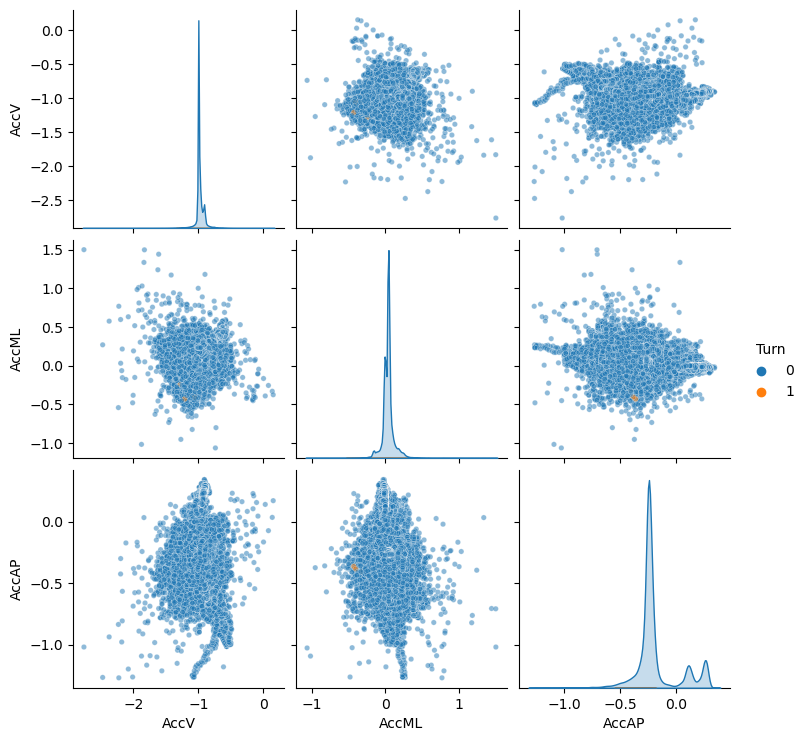

In [8]:
# Visualization Features (checking and testing)
color_var = 'Turn' 
sns.pairplot(data=df[accs+[color_var]],
             hue=color_var,
             plot_kws = {'s': 15, 
                         'alpha' : 0.5})
plt.show()

In [9]:
# Visualization of the tdcs file (Import and Preview)
file_path = 'tdcsfog/024ba3ebd5.csv'
df = pd.read_csv('../input/tlvmc-parkinsons-freezing-gait-prediction/train/'+file_path)
df.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.621626,0.868007,0.917401,0,0,0
1,1,-9.610281,0.854139,0.914957,0,0,0
2,2,-9.601191,0.840308,0.912514,0,0,0
3,3,-9.587583,0.835592,0.910251,0,0,0
4,4,-9.560258,0.828591,0.917209,0,0,0


In [10]:
df.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.0,3275.0,3275.0
mean,1637.000000,-9.334651,0.390066,2.519900,0.0,0.0,0.0
std,945.555392,1.321753,1.139888,1.343475,0.0,0.0,0.0
min,0.000000,-19.448123,-9.448312,-0.636999,0.0,0.0,0.0
25%,818.500000,-9.826858,-0.293998,1.614969,0.0,0.0,0.0
50%,1637.000000,-9.281706,0.423231,2.440535,0.0,0.0,0.0
75%,2455.500000,-8.553719,1.027872,3.267758,0.0,0.0,0.0
max,3274.000000,-4.886311,4.500107,9.761721,0.0,0.0,0.0


In [11]:
df.isnull().sum()

Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

In [12]:
subjects.head()

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20


In [13]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject       173 non-null    object 
 1   Visit         111 non-null    float64
 2   Age           173 non-null    int64  
 3   Sex           173 non-null    object 
 4   YearsSinceDx  173 non-null    float64
 5   UPDRSIII_On   172 non-null    float64
 6   UPDRSIII_Off  132 non-null    float64
 7   NFOGQ         173 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 10.9+ KB


In [14]:
tasks.head()

,Id,Begin,End,Task
0,02ab235146,10.00,190.48,Rest1
1,02ab235146,211.24,271.56,Rest2
2,02ab235146,505.88,522.40,4MW
3,02ab235146,577.96,594.64,4MW-C
4,02ab235146,701.32,715.28,MB1


In [15]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2817 non-null   object 
 1   Begin   2817 non-null   float64
 2   End     2817 non-null   float64
 3   Task    2817 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.2+ KB


In [16]:
# Feature Engineering Starts
from sklearn.cluster import KMeans

# Data Preparation
# Perform KMeans clustering on tasks data
tasks['Duration'] = tasks['End'] - tasks['Begin']
tasks = pd.pivot_table(tasks, values=['Duration'], index=['Id'], columns=['Task'], aggfunc='sum', fill_value=0)
tasks.columns = [c[-1] for c in tasks.columns]
tasks = tasks.reset_index()
tasks['t_kmeans'] = cluster.KMeans(n_clusters=10, random_state=3).fit_predict(tasks[tasks.columns[1:]])

# Perform KMeans clustering on subjects data
subjects = subjects.fillna(0).groupby('Subject').median()
subjects = subjects.reset_index()
subjects.rename(columns={'Subject':'Id'}, inplace=True)
subjects['s_kmeans'] = cluster.KMeans(n_clusters=10, random_state=3).fit_predict(subjects[subjects.columns[1:]])

#n_clusters_subjects = 20
#n_clusters_subjects = 10
#kmeans_subjects = KMeans(n_clusters=n_clusters_subjects, random_state=3)
#subjects['s_kmeans'] = kmeans_subjects.fit_predict(subjects[subjects.columns[1:]])


# Run K-means Clustering
# subjects['s_kmeans'] = cluster.KMeans(n_clusters=10, random_state=3).fit_predict(subjects[subjects.columns[1:]])

In [17]:
display(tasks)
display(subjects)

,Id,4MW,4MW-C,Hotspot1,Hotspot1-C,Hotspot2,Hotspot2-C,MB1,MB10,MB11,...,MB9,Rest1,Rest2,TUG-C,TUG-DT,TUG-ST,Turning-C,Turning-DT,Turning-ST,t_kmeans
0,02ab235146,16.520,16.680,16.760,16.240,53.920,64.600,13.960,17.960,17.400,...,30.800,180.48,60.32,38.440,47.920,36.240,21.920,46.400,23.320,2
1,02ea782681,11.618,11.796,11.525,11.692,8.329,9.032,3.469,6.624,6.230,...,30.650,0.00,0.00,18.343,19.932,20.130,18.042,21.588,18.698,7
2,06414383cf,24.860,41.584,25.885,0.000,38.642,0.000,0.000,0.000,0.000,...,0.000,0.00,0.00,0.000,44.832,33.867,0.000,83.837,124.299,1
3,092b4c1819,13.664,0.000,15.409,0.000,34.834,0.000,0.000,0.000,0.000,...,0.000,0.00,0.00,0.000,30.166,23.347,0.000,45.025,39.351,7
4,0a900ed8a2,11.720,11.840,10.600,10.720,43.171,41.160,1.760,21.040,10.560,...,30.520,180.88,60.32,18.083,25.000,19.920,18.699,18.200,16.880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,f3a921edee,16.722,0.000,16.383,0.000,76.200,0.000,0.000,0.000,0.000,...,0.000,0.00,0.00,0.000,29.043,29.820,0.000,136.840,76.960,1
133,f40e8c6ebe,12.867,0.000,27.906,0.000,152.333,0.000,0.000,0.000,0.000,...,0.000,0.00,0.00,0.000,36.805,28.232,0.000,98.579,69.889,1
134,f8ddbdd98d,23.787,0.000,32.556,0.000,38.557,0.000,6.347,10.356,10.655,...,33.289,0.00,0.00,0.000,44.132,54.993,0.000,100.433,72.152,1
135,f9efef91fb,16.351,17.552,16.155,15.166,67.059,51.715,0.000,0.000,0.000,...,0.000,0.00,0.00,23.483,23.541,22.137,36.898,38.632,30.831,4


,Id,Visit,Age,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,s_kmeans
0,04fcdb,1.0,63.0,3.0,30.0,0.0,0.0,1
1,05595e,1.0,56.0,8.0,28.0,0.0,0.0,1
2,0967b2,1.5,59.0,10.0,37.5,46.0,16.0,7
3,097078,0.0,70.0,10.0,27.0,50.0,20.0,0
4,0e0908,0.0,67.0,6.0,16.0,61.0,21.0,0
...,...,...,...,...,...,...,...,...
131,f80d3a,1.5,78.0,18.0,23.5,29.5,17.5,4
132,f90887,1.5,72.0,16.0,29.0,43.5,24.0,0
133,fc1e1b,1.0,82.0,11.0,38.0,42.0,21.0,5
134,fe5d84,1.5,72.0,14.0,22.5,39.0,16.0,0


In [18]:
#complex_featlist=['Visit','Test','Medication','sub_Visit','sub_Age','sub_YearsSinceDx','sub_UPDRSIII_On','sub_UPDRSIII_Off','sub_NFOGQ','sub_kmeans']
#metadata_complex=metadata.merge(subjects,how='left',on='Subject').copy()
#metadata_complex['Medication']=metadata_complex['Medication'].factorize()[0]
#display(metadata_complex)

In [19]:
# Create a tsflex Feature Collection
from seglearn.feature_functions import base_features, emg_features
from tsflex.features import FeatureCollection, MultipleFeatureDescriptors
from tsflex.features.integrations import seglearn_feature_dict_wrapper

# Create basic feature descriptors
basic_feats = MultipleFeatureDescriptors(
    functions=seglearn_feature_dict_wrapper(base_features()),
    series_names=['AccV', 'AccML', 'AccAP'],
    windows=[5_000], # Caculation Size
    strides=[5_000],
)

# EMG feature descriptor
emg_feats = emg_features()
del emg_feats['simple square integral'] # is same as abs_energy (which is in base_features)

emg_feats = MultipleFeatureDescriptors(
    functions=seglearn_feature_dict_wrapper(emg_feats),
    series_names=['AccV', 'AccML', 'AccAP'],
    windows=[5_000],
    strides=[5_000],
)

# Create a FeatureCollection with basic and EMG features
fc = FeatureCollection([basic_feats, emg_feats])


#display(fc)

# Extract features from FeatureCollection
# features = FC.get_nb_output_features()

# Apply Min-Max scaling to features
# scaler = MinMaxScaler()
# scaled_features = {key: scaler.fit_transform(value.reshape(-1, 1)).flatten() for key, value in features.items()}

# Create a new FeatureCollection with scaled features
# FC_scaled = FeatureCollection(scaled_features)

In [20]:
# Extract the features
def reader(f):
    try:# Read CSV file and select relevant columns
        df = pd.read_csv(f, index_col="Time", usecols=['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn' , 'Walking'])
        df['Id'] = f.split('/')[-1].split('.')[0]
        df = pd.merge(df, tasks[['Id','t_kmeans']], how='left', on='Id').fillna(-1)
        df = pd.merge(df, subjects[['Id','s_kmeans']], how='left', on='Id').fillna(-1)
        df_feats = fc.calculate(df, return_df=True, include_final_window=True, approve_sparsity=True, window_idx="begin").astype(np.float32)
        df = df.merge(df_feats, how="left", left_index=True, right_index=True)
        df.fillna(method="ffill", inplace=True)
        return df
    except: pass

# Concatenate data from multiple files using list comprehension and tqdm for progress tracking
train = pd.concat([reader(f) for f in tqdm(train)]).fillna(0); print(train.shape)

# Select columns
cols = [c for c in train.columns if c not in ['Id', 'Time', 'StartHesitation', 'Turn' , 'Walking', 'Valid', 'Task','Event']]
pcols = ['StartHesitation', 'Turn' , 'Walking']
scols = ['Id', 'StartHesitation', 'Turn' , 'Walking']

  0%|          | 0/970 [00:00<?, ?it/s]

(20588374, 66)


In [21]:
# Training the Model(with Cross Validation)
x_1, x_2, y_1, y_2 = model_selection.train_test_split(train[cols], train[pcols], test_size=.2, random_state=3, stratify=train[pcols])
reg = ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=7, n_jobs=-1, random_state=3)
reg.fit(x_2,y_2)

tree_metrics = metrics.average_precision_score(y_1[:1_000_000], reg.predict(x_1[:1_000_000]).clip(0.0,1.0))
print(tree_metrics)

0.6831901035819


In [22]:
# Blending Scikit-Learn Models(and Multi_out Regressor)
multiout_reg = multioutput.MultiOutputRegressor
gb_reg = multiout_reg(ensemble.GradientBoostingRegressor())
gb_reg.fit(x_2,y_2)
gb_metrics = metrics.average_precision_score(y_1[:1_000_000], gb_reg.predict(x_1[:1_000_000]).clip(0.0,1.0))

print(gb_metrics)

0.7350297900689323


In [23]:
nn_reg = multiout_reg(neural_network.MLPClassifier())
# nn_reg = multiout_reg(neighbors.NearestCentroid())
nn_reg.fit(x_1[:1_000_000],y_1[:1_000_000])
ap_score_nn = metrics.average_precision_score(y_2, nn_reg.predict(x_2).clip(0.0,1.0))

print(ap_score_nn)

0.04678980821548853


In [24]:
# Predicting for test
total = gb_metrics + tree_metrics + ap_score_nn
w_gb = gb_metrics / total
w_tree = tree_metrics / total
w_nn = ap_score_nn / total

# w_gb = 0.3
# w_tree = 0.7

In [25]:
# Submission Preparation
sub['t'] = 0
submission = []
for f in test:
    df = pd.read_csv(f)
    df.set_index('Time', drop=True, inplace=True)
    df['Id'] = f.split('/')[-1].split('.')[0]
#     df = df.fillna(0).reset_index(drop=True)
    df = pd.merge(df, tasks[['Id','t_kmeans']], how='left', on='Id').fillna(-1)
    df = pd.merge(df, subjects[['Id','s_kmeans']], how='left', on='Id').fillna(-1)
    df_feats = fc.calculate(df, return_df=True, include_final_window=True, approve_sparsity=True, window_idx="begin")
    df = df.merge(df_feats, how="left", left_index=True, right_index=True)
    df.fillna(method="ffill", inplace=True)
    
    preds_tree = reg.predict(df[cols]).clip(0.0,1.0)
    preds_gb = gb_reg.predict(df[cols]).clip(0.0,1.0)
    preds_nn = nn_reg.predict(df[cols]).clip(0.0,1.0)
    preds = preds_tree * w_tree + preds_gb * w_gb + preds_nn * w_nn

    res = pd.DataFrame(np.round(preds,3), columns=pcols)

    df = pd.concat([df,res], axis=1)
    df['Id'] = df['Id'].astype(str) + '_' + df.index.astype(str)
    submission.append(df[scols])
submission = pd.concat(submission)
submission = pd.merge(sub[['Id','t']], submission, how='left', on='Id').fillna(0.0)
submission[scols].to_csv('submission.csv', index=False)

In [26]:
submission

,Id,t,StartHesitation,Turn,Walking
0,003f117e14_0,0,0.038,0.024,0.003
1,003f117e14_1,0,0.038,0.024,0.003
2,003f117e14_2,0,0.038,0.024,0.003
3,003f117e14_3,0,0.038,0.024,0.003
4,003f117e14_4,0,0.038,0.024,0.003
...,...,...,...,...,...
286365,02ab235146_281683,0,0.000,0.054,0.031
286366,02ab235146_281684,0,0.000,0.054,0.031
286367,02ab235146_281685,0,0.000,0.054,0.031
286368,02ab235146_281686,0,0.000,0.054,0.031
